## EDA with Time Series Data

Agenda:
1. Pandas Data Reader for Financial Data
2. Date Time Index
3. Time Resampling
4. Time Shifts
5. Mean Rolling and Expanding
6. Time Series visualization

## Theory: Basic Idea of Time Series Data

### Upward Trend

Although there may be ups and downs in the data, if the data has an overall upward trend, we will have the following observations:
1. The mean of the data increases
2. The variance will remain more or less the same

### Stationary Data

Although there may be ups and downs in the data, if the data has an overall same trend with no overall upward or downward movements, then the data is stationery.

### Downward Trend

Although there may be ups and downs in the data, if the data has an overall downward trend, we will have the following observations:

1. The mean of the data decreases
2. The variance will remain more or less the same

### Cyclic Data

Any data, which sudden increase or decrease with no observable trend, is called cyclic data (like stocks). Stock data works on people sentiments, economy, and other factors.
Sales data, on the other hand, is easy to forecast.

In [4]:
#Install Pandas Data Reader
!pip install pandas-datareader

In [6]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [16]:
pip install --upgrade pandas_datareader requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask-monitoringdashboard 3.3.2 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import yfinance as yf

data = yf.download('TSLA')
print(data)


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2010-06-29    1.592667    1.666667    1.169333    1.266667  281494500
2010-06-30    1.588667    2.028000    1.553333    1.719333  257806500
2010-07-01    1.464000    1.728000    1.351333    1.666667  123282000
2010-07-02    1.280000    1.540000    1.247333    1.533333   77097000
2010-07-06    1.074000    1.333333    1.055333    1.333333  103003500
...                ...         ...         ...         ...        ...
2025-01-14  396.359985  422.640015  394.540009  414.339996   84565000
2025-01-15  428.220001  429.799988  405.660004  409.899994   81375500
2025-01-16  413.820007  424.000000  409.130005  423.489990   68335200
2025-01-17  426.500000  439.739990  419.750000  421.500000   94504200
2025-01-21  417.255005  432.984589  406.309998  432.809998   54460498

[3664 rows x 5 colu

In [23]:
data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000
2025-01-15,428.220001,429.799988,405.660004,409.899994,81375500


<Axes: xlabel='Date'>

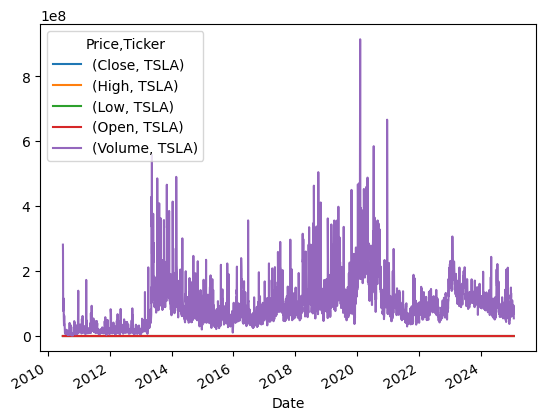

In [26]:
data.plot() #volume means the number of shares traded on the specific date

<Axes: xlabel='Date'>

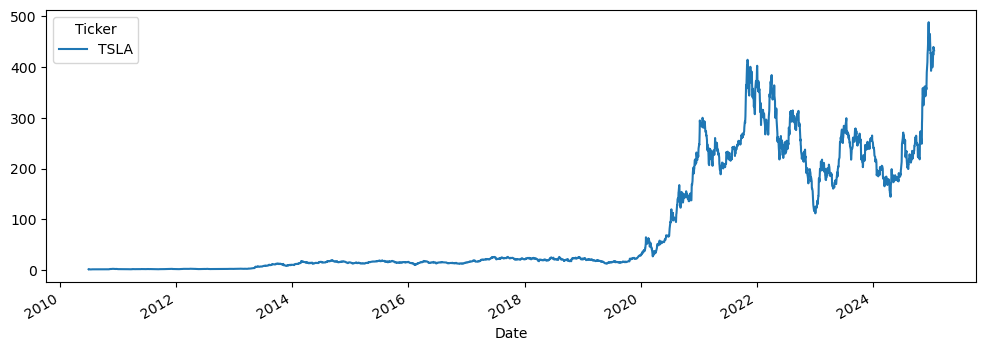

In [29]:
data['High'].plot(figsize = (12, 4)) #Tesla stock price has been increasing recently

<Axes: xlabel='Date'>

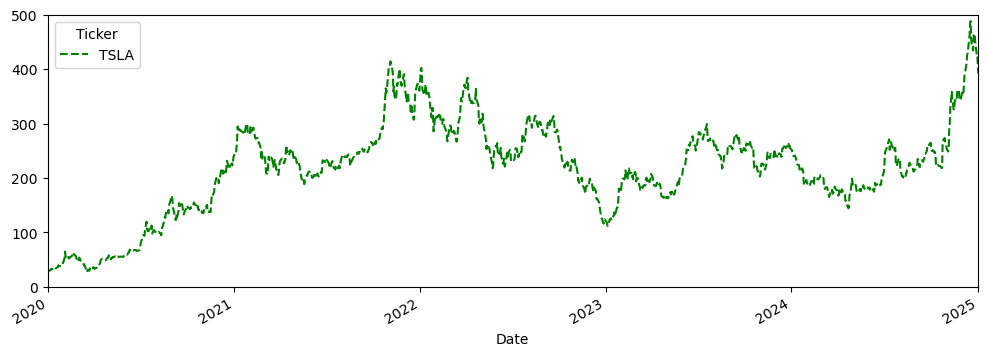

In [40]:
#Interested in 2020 - 2025 due to higher stock prices, so we will put X and Y limits. We will also apply coloring and line style
data['High'].plot(xlim = ['2020-01-01', '2025-01-01'], ylim = [0, 500],figsize = (12, 4), c = 'green', ls = '--') #Tesla stock price has been increasing recently

In [42]:
data.index #get all the dates

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2025-01-06', '2025-01-07', '2025-01-08', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-21'],
              dtype='datetime64[ns]', name='Date', length=3664, freq=None)

In [46]:
#getting specific dates using the indices using loc
index = data.loc['2020-01-01': '2025-01-01'].index

In [47]:
share_open = data.loc['2020-01-01': '2025-01-01']['Open']

In [48]:
share_open

Ticker,TSLA
Date,
2020-01-02,28.299999
2020-01-03,29.366667
2020-01-06,29.364668
2020-01-07,30.760000
2020-01-08,31.580000
...,...
2024-12-24,435.899994
2024-12-26,465.160004
2024-12-27,449.519989


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

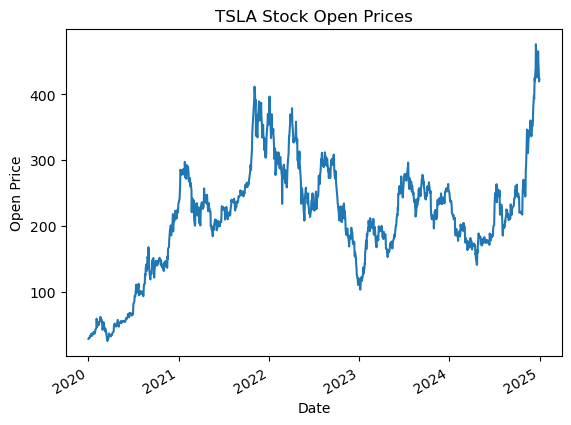

In [62]:
#Draw a subplot with respect to share_open data
figure, axis = plt.subplots()
axis.plot(index, share_open)
axis.set_title('TSLA Stock Open Prices')
axis.set_xlabel('Date')
axis.set_ylabel('Open Price')
#Prevent overlap
figure.autofmt_xdate()
plt.show()

## Datetime Index

In [66]:
data = data.reset_index()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        3664 non-null   datetime64[ns]
 1   (Close, TSLA)   3664 non-null   float64       
 2   (High, TSLA)    3664 non-null   float64       
 3   (Low, TSLA)     3664 non-null   float64       
 4   (Open, TSLA)    3664 non-null   float64       
 5   (Volume, TSLA)  3664 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 171.9 KB


In [70]:
data = data.set_index('Date', drop = True)

In [72]:
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [73]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000
2025-01-15,428.220001,429.799988,405.660004,409.899994,81375500
2025-01-16,413.820007,424.000000,409.130005,423.489990,68335200


In [74]:
##datetime
from datetime import datetime

In [81]:
datetime.now()

datetime.datetime(2025, 1, 21, 13, 13, 49, 439506)

In [83]:
date = datetime(2025, 11, 21) #selecting a random date

In [84]:
date.date()

datetime.date(2025, 11, 21)

In [86]:
date.weekday()

4

In [89]:
date.year

2025

In [90]:
date.month

11

## Time Resampling

In [91]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [100]:
#'YE' means year end frequency
data.resample(rule = 'YE').min()
# see only 15 rows of data, with last dates of the year with minimum values of high, low, open, close, volume, adj close

,Close,High,Low,Open,Volume
Date,,,,,
2010-12-31,1.053333,1.108667,0.998667,1.076000,1777500
2011-12-31,1.455333,1.484667,1.407333,1.452000,3594000
2012-12-31,1.519333,1.790000,1.509333,1.774667,5473500
2013-12-31,2.194000,2.225333,2.140667,2.205333,6603000
2014-12-31,9.289333,9.800000,9.111333,9.366667,19983000
2015-12-31,12.333333,12.619333,12.093333,12.388667,10620000
2016-12-31,9.578000,10.331333,9.403333,9.488000,24892500
2017-12-31,14.466000,14.688667,14.064000,14.316667,32800500
2018-12-31,16.704000,17.355333,16.306000,16.851999,46210500


In [101]:
#'YE' means year end frequency
data.resample(rule = 'YE').max()
# see only 15 rows of data, with last dates of the year with maximum values of high, low, open, close, volume, adj close

,Close,High,Low,Open,Volume
Date,,,,,
2010-12-31,2.364667,2.428000,2.316667,2.391333,281494500
2011-12-31,2.329333,2.333333,2.268667,2.308667,172767000
2012-12-31,2.534000,2.663333,2.474000,2.546000,85206000
2013-12-31,12.891333,12.966667,12.558000,12.930667,557458500
2014-12-31,19.069332,19.427999,18.693333,19.177999,490225500
2015-12-31,18.817333,19.110001,18.420000,18.680000,234744000
2016-12-31,17.694668,17.955999,16.967333,17.763332,356136000
2017-12-31,25.666668,25.974001,25.290001,25.779333,296871000
2018-12-31,25.304667,25.830667,24.474667,25.000000,504745500


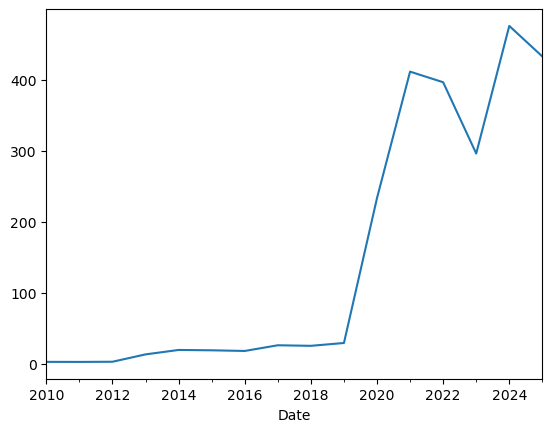

In [102]:
#Plot this maximum data for 'Open' values to see the rise from 2010 to 2025
data.resample(rule = 'YE').max()['Open'].plot()
plt.show()

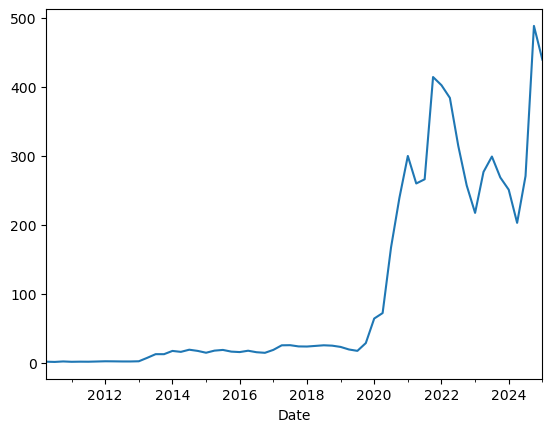

In [106]:
#Quarterly start frequency
data.resample(rule = 'QS').max()['High'].plot()
plt.show()

In [124]:
##Business end frequency
data.resample(rule = 'BYE').max()

,Close,High,Low,Open,Volume
Date,,,,,
2010-12-31,2.364667,2.428000,2.316667,2.391333,281494500
2011-12-30,2.329333,2.333333,2.268667,2.308667,172767000
2012-12-31,2.534000,2.663333,2.474000,2.546000,85206000
2013-12-31,12.891333,12.966667,12.558000,12.930667,557458500
2014-12-31,19.069332,19.427999,18.693333,19.177999,490225500
2015-12-31,18.817333,19.110001,18.420000,18.680000,234744000
2016-12-30,17.694668,17.955999,16.967333,17.763332,356136000
2017-12-29,25.666668,25.974001,25.290001,25.779333,296871000
2018-12-31,25.304667,25.830667,24.474667,25.000000,504745500


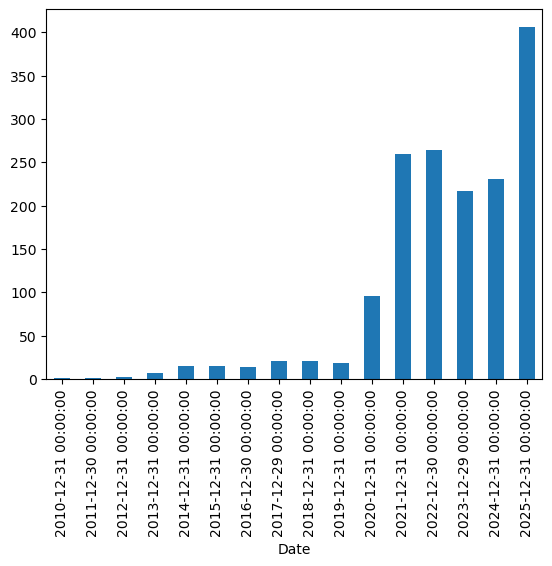

In [125]:
#Plot business end frequency mean open vlues bar plot
data['Open'].resample(rule = 'BYE').mean().plot(kind = 'bar')
plt.show()

In [140]:
#Checking max Open data with respect to 'M' for monthly data
data.resample(rule = 'ME').max()

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-30,1.592667,2.028000,1.553333,1.719333,281494500
2010-07-31,1.464000,1.728000,1.404000,1.666667,123282000
2010-08-31,1.463333,1.478667,1.390000,1.463333,19219500
2010-09-30,1.465333,1.544000,1.408667,1.476667,40267500
2010-10-31,1.456000,1.458000,1.403333,1.426000,9913500
...,...,...,...,...,...
2024-09-30,261.630005,264.859985,255.770004,260.600006,119355000
2024-10-31,269.190002,273.540009,262.239990,270.000000,204491900
2024-11-30,352.559998,361.929993,338.200012,360.140015,210521600


## Rolling

In [162]:
data['High'].rolling(10).mean().head(20) #when we give a window of 10 days, we will get a rolling mean of each two rows within the 'High column'

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13    1.421333
2010-07-14    1.389000
2010-07-15    1.329533
2010-07-16    1.298733
2010-07-19    1.293067
2010-07-20    1.305400
2010-07-21    1.333867
2010-07-22    1.358733
2010-07-23    1.383133
2010-07-26    1.406000
2010-07-27    1.422933
Name: High, dtype: float64

In [163]:
data['Open: 30 Days Rolling'] = data['Open'].rolling(30).mean()

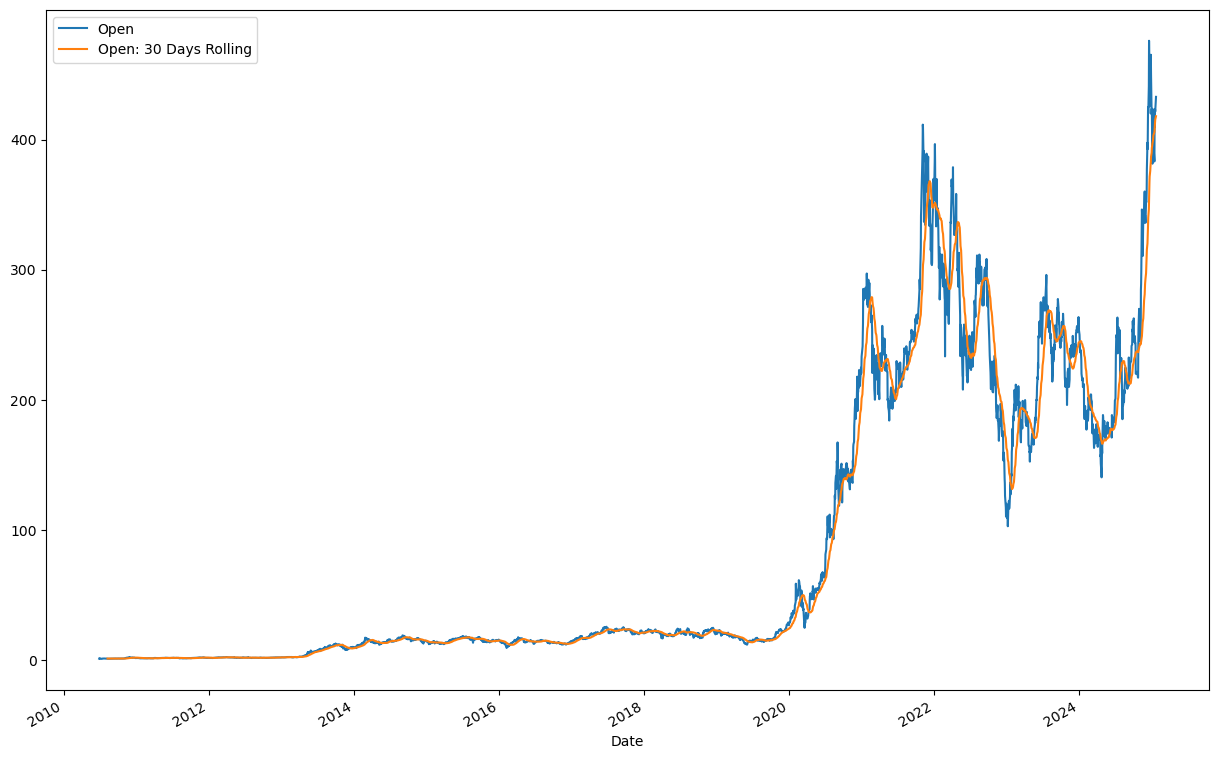

In [171]:
#Plot 'Open' and 'Open: 30 Days Rolling'
data[['Open', 'Open: 30 Days Rolling']].plot(figsize = (15, 10))
axis.set_title('Open and Open 30 Days Rolling')
axis.set_xlabel('Date')
axis.set_ylabel('Open Price')
plt.show()